<a href="https://colab.research.google.com/github/adonezukanma/Data-Software-Engineer/blob/main/Ezukanma8551_Finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os # Allows us to use os commands
import sys # needed to set print options
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib. image import imread # This will allow us to read images directly.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/GoogleDrive')

Mounted at /content/GoogleDrive


In [ ]:
data_dir='/content/GoogleDrive/MyDrive/DATASETS/FINALPROJECT'
test_path = data_dir+'/test/'
train_path = data_dir+'/train/'
val_path = data_dir+'/validate/'

In [ ]:
train_donuts_image_list = os.listdir(train_path+'donuts')
train_onion_rings_image_list = os.listdir(train_path+'onion_rings')
train_pizza_image_list = os.listdir(train_path+'pizza')
train_spring_rolls_image_list = os.listdir(train_path+'spring_rolls')
train_steak_image_list = os.listdir(train_path+'steak')

val_donuts_image_list = os.listdir(val_path+'donuts')
val_onion_rings_image_list = os.listdir(val_path+'onion_rings')
val_pizza_image_list = os.listdir(val_path+'pizza')
val_spring_rolls_image_list = os.listdir(val_path+'spring_rolls')
val_steak_image_list = os.listdir(val_path+'steak')

test_donuts_image_list = os.listdir(test_path+'donuts')
test_onion_rings_list = os.listdir(test_path+'onion_rings')
test_pizza_list = os.listdir(test_path+'pizza')
test_spring_rolls_list = os.listdir(test_path+'spring_rolls')
test_steak_list = os.listdir(test_path+'steak')



In [ ]:
image_gen = ImageDataGenerator (rotation_range=20, # randomley rotate the image from 0 to 20 degrees
                                width_shift_range=0.10, # Shift the pic width by a max of 10%
                                height_shift_range=0.10, # Shift the pic height by a max of 10%
                                shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                                zoom_range=0.1, # Zoom in by 10% max
                                horizontal_flip=True, # Allo horizontal flipping
                                # rescale=1/255, # Rescale the image by normalzing it.
                                fill_mode= 'nearest' # Fill in missing pixels with the nearest filled value
)

In [ ]:
image_gen.flow_from_directory(train_path)

Found 3500 images belonging to 5 classes.


In [ ]:
image_gen.flow_from_directory(val_path)

Found 1000 images belonging to 5 classes.


In [ ]:
image_shape=(130,130,3)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense (128))
model.add(Activation( 'relu'))

model.add(Dropout(0.10))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
                optimizer ='rmsprop',
                metrics=['accuracy' ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0

In [ ]:
batch_size = 25

train_image_gen = image_gen.flow_from_directory (train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size, class_mode='binary')


Found 3500 images belonging to 5 classes.


In [ ]:
val_image_gen = image_gen.flow_from_directory(val_path,
                                              target_size=image_shape[:2],
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='binary',
                                              shuffle=False)

Found 1000 images belonging to 5 classes.


In [ ]:
test_image_gen = image_gen. flow_from_directory(test_path,
                                                target_size=image_shape [:2],
                                                color_mode= 'rgb',
                                                batch_size=batch_size,
                                                class_mode='binary', shuffle=False)


Found 500 images belonging to 5 classes.


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
results = model.fit_generator(train_image_gen,epochs=5,
                              validation_data=val_image_gen,
                              callbacks=[early_stop])

Epoch 1/5
140/140 [==============================] - 1778s 13s/step - loss: -604072378368.0000 - accuracy: 0.2003 - val_loss: -3243835392000.0000 - val_accuracy: 0.2000
Epoch 2/5
140/140 [==============================] - 162s 1s/step - loss: -28313902907392.0000 - accuracy: 0.2000 - val_loss: -83492754948096.0000 - val_accuracy: 0.2000
Epoch 3/5
140/140 [==============================] - 159s 1s/step - loss: -292738025127936.0000 - accuracy: 0.2000 - val_loss: -631323819507712.0000 - val_accuracy: 0.2000
Epoch 4/5
140/140 [==============================] - 158s 1s/step - loss: -1479270891257856.0000 - accuracy: 0.2000 - val_loss: -2728310329049088.0000 - val_accuracy: 0.2000
Epoch 5/5
140/140 [==============================] - 159s 1s/step - loss: -5401723459862528.0000 - accuracy: 0.2000 - val_loss: -8805999364276224.0000 - val_accuracy: 0.2000


In [ ]:
trainingHistory = pd.DataFrame(model.history.history)
HistDF=pd.DataFrame(trainingHistory)

In [ ]:
HistDF #each row is for one epoch

,loss,accuracy,val_loss,val_accuracy
0,-6.040724e+11,0.200286,-3.243835e+12,0.2
1,-2.831390e+13,0.200000,-8.349275e+13,0.2
2,-2.927380e+14,0.200000,-6.313238e+14,0.2
3,-1.479271e+15,0.200000,-2.728310e+15,0.2
4,-5.401723e+15,0.200000,-8.805999e+15,0.2


<Axes: >

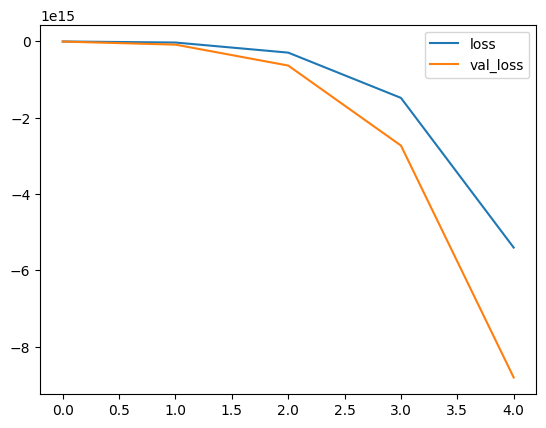

In [ ]:
HistDF[['loss','val_loss']].plot ()

<Axes: >

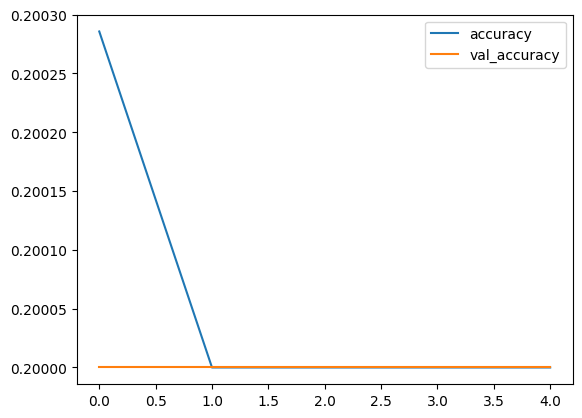

In [ ]:
HistDF[['accuracy','val_accuracy']].plot()


In [ ]:
print(model.metrics_names)
print(model.evaluate_generator(val_image_gen))

['loss', 'accuracy']
[-8775431008288768.0, 0.20000000298023224]


In [ ]:
pred_probabilities = model.predict_generator(val_image_gen)


In [ ]:
print(np.round(pred_probabilities,2))


[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix


In [ ]:
predictions = pred_probabilities > 0.5

In [ ]:
print(classification_report(val_image_gen.classes,predictions))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       200
           1       0.20      1.00      0.33       200
           2       0.00      0.00      0.00       200
           3       0.00      0.00      0.00       200
           4       0.00      0.00      0.00       200

    accuracy                           0.20      1000
   macro avg       0.04      0.20      0.07      1000
weighted avg       0.04      0.20      0.07      1000



In [ ]:
confusion_matrix(val_image_gen.classes,predictions)

array([[  0, 200,   0,   0,   0],
       [  0, 200,   0,   0,   0],
       [  0, 200,   0,   0,   0],
       [  0, 200,   0,   0,   0],
       [  0, 200,   0,   0,   0]])

In [ ]:
test_donuts_image = test_path + 'donuts/' + test_donuts_image_list[99] # Accessing the last element of the list
print(test_donuts_image)


test_onion_rings_image = test_path + 'onion_rings/' + test_onion_rings_list[99] # Accessing the last element of the list
print(test_onion_rings_image)


test_pizza_image = test_path + 'pizza/' + test_pizza_list[99] # Accessing the last element of the list
print(test_pizza_image)


test_spring_rolls_image = test_path + 'spring_rolls/' + test_spring_rolls_list[99] # Accessing the last element of the list
print(test_spring_rolls_image)


test_steak_image = test_path + 'steak/' + test_steak_list[99] # Accessing the last element of the list
print(test_steak_image)

/content/GoogleDrive/MyDrive/DATASETS/FINALPROJECT/test/donuts/510263.jpg
/content/GoogleDrive/MyDrive/DATASETS/FINALPROJECT/test/onion_rings/890921.jpg
/content/GoogleDrive/MyDrive/DATASETS/FINALPROJECT/test/pizza/419962.jpg
/content/GoogleDrive/MyDrive/DATASETS/FINALPROJECT/test/spring_rolls/356324.jpg
/content/GoogleDrive/MyDrive/DATASETS/FINALPROJECT/test/steak/221604.jpg


In [ ]:
from tensorflow.keras.preprocessing import image

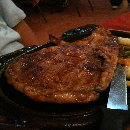

In [ ]:
test_donuts_image_path = test_path + 'donuts/' + test_donuts_image_list[99]
test_donuts_image = image.load_img(test_donuts_image_path, target_size=image_shape)
test_donuts_image

# Example: Access the 130th image from the 'onion_rings' category
test_onion_rings_image_path = test_path + 'onion_rings/' + test_onion_rings_list[99]
test_onion_rings_image = image.load_img(test_onion_rings_image_path, target_size=image_shape)
test_onion_rings_image

# Example: Access the 130th image from the 'pizza' category
test_pizza_image_path = test_path + 'pizza/' + test_pizza_list[99]
test_pizza_image = image.load_img(test_pizza_image_path, target_size=image_shape)
test_pizza_image

# Example: Access the 130th image from the 'spring_rolls' category
test_spring_rolls_image_path = test_path + 'spring_rolls/' + test_spring_rolls_list[99]
test_spring_rolls_image = image.load_img(test_spring_rolls_image_path, target_size=image_shape)
test_spring_rolls_image

# Example: Access the 130th image from the 'steak' category
test_steak_image_path = test_path + 'steak/' + test_steak_list[99]
test_steak_image = image.load_img(test_steak_image_path, target_size=image_shape)
test_steak_image


In [ ]:
test_donuts_image = image.img_to_array(test_donuts_image) # Step 1 above
print(test_donuts_image.shape)
test_donuts_image = np.expand_dims(test_donuts_image, axis=0) # Step 2 above
print(test_donuts_image.shape)

(130, 130, 3)
(1, 130, 130, 3)


In [ ]:
print(model.predict(test_donuts_image))

1/1 [==============================] - 0s 198ms/step
[[1.]]


In [ ]:
import os


test_path = '/content/GoogleDrive/MyDrive/DATASETS/FINALPROJECT/test/'


category = 'donuts'
index = 7


category_path = os.path.join(test_path, category)


if os.path.exists(category_path):
    test_image_path = os.path.join(category_path, os.listdir(category_path)[index])
    print(test_image_path)
else:
    print(f"Error: The directory '{category_path}' does not exist.")



from tensorflow.keras.preprocessing import image


image_shape = (128, 128)

if os.path.exists(test_image_path):
    test_image = image.load_img(test_image_path, target_size=image_shape)
    test_image
else:
    print(f"Error: The image '{test_image_path}' does not exist.")


/content/GoogleDrive/MyDrive/DATASETS/FINALPROJECT/test/donuts/482227.jpg


In [ ]:
import os
from tensorflow.keras.preprocessing import image


test_path = '/content/GoogleDrive/MyDrive/DATASETS/FINALPROJECT/test/'


category = 'donuts'
index = 7


image_shape = (128, 128)


category_path = os.path.join(test_path, category)


if os.path.exists(category_path):

    category_image_list = os.listdir(category_path)


    if index < len(category_image_list):

        test_image_path = os.path.join(category_path, category_image_list[index])
        print(test_image_path)


        test_image = image.load_img(test_image_path, target_size=image_shape)
        test_image.show()
    else:
        print(f"Error: The index {index} is out of range for the category '{category}'.")
else:
    print(f"Error: The directory '{category_path}' does not exist.")


/content/GoogleDrive/MyDrive/DATASETS/FINALPROJECT/test/donuts/482227.jpg


In [ ]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np


test_path = '/content/GoogleDrive/MyDrive/DATASETS/FINALPROJECT/test/'
category = 'donuts'
index = 7
image_shape = (128, 128)


category_path = os.path.join(test_path, category)
if os.path.exists(category_path):
    category_image_list = os.listdir(category_path)

    if index < len(category_image_list):

        test_image_path = os.path.join(category_path, category_image_list[index])
        print(test_image_path)


        test_image = image.load_img(test_image_path, target_size=image_shape)
        test_image_array = np.expand_dims(image.img_to_array(test_image), axis=0)


        print(f"Original shape: {test_image_array.shape[1:]}, Expanded shape: {test_image_array.shape}")
    else:
        print(f"Error: The index {index} is out of range for the category '{category}'.")
else:
    print(f"Error: The directory '{category_path}' does not exist.")



/content/GoogleDrive/MyDrive/DATASETS/FINALPROJECT/test/donuts/482227.jpg
Original shape: (128, 128, 3), Expanded shape: (1, 128, 128, 3)


In [ ]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np

# Define the test path
test_path = '/content/GoogleDrive/MyDrive/DATASETS/FINALPROJECT/test/'

# Define the category you want to check and the specific index
category = 'donuts'
index = 7

# Define the target image size for resizing
image_shape = (128, 128)  # Example target size

# Construct the full directory path
category_path = os.path.join(test_path, category)

# Verify the path exists
if os.path.exists(category_path):
    # Get the list of images in the category directory
    category_image_list = os.listdir(category_path)

    # Check if the index is within the range of available images
    if index < len(category_image_list):
        # Construct the full path to the specific image at the given index
        test_image_path = os.path.join(category_path, category_image_list[index])
        print(test_image_path)  # Check the constructed path

        # Load and resize the image
        test_image = image.load_img(test_image_path, target_size=image_shape)

        # Convert the image to an array and preprocess for prediction
        test_image_array = image.img_to_array(test_image)
        test_image_array = np.expand_dims(test_image_array, axis=0)
        test_image_array = test_image_array / 255.0  # Normalize the image data

        # Print the shape of the image array
        print(f"Image shape: {test_image_array.shape}")

        # Make predictions using the model
        predictions = model.predict(test_image_array)
        print(predictions)

    else:
        print(f"Error: The index {index} is out of range for the category '{category}'.")
else:
    print(f"Error: The directory '{category_path}' does not exist.")


/content/GoogleDrive/MyDrive/DATASETS/FINALPROJECT/test/donuts/482227.jpg
Image shape: (1, 128, 128, 3)
1/1 [==============================] - 0s 188ms/step
[[1.]]


In [ ]:
test_pred_probabilities = model.predict_generator(test_image_gen)

In [ ]:
print (test_image_gen. class_indices)
print(test_image_gen. classes)


{'donuts': 0, 'onion_rings': 1, 'pizza': 2, 'spring_rolls': 3, 'steak': 4}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [ ]:
print(np.round(test_pred_probabilities,2))



[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
test_predictions = test_pred_probabilities > 0.5



In [ ]:
print(classification_report(test_image_gen.classes,test_predictions))



              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.20      1.00      0.33       100
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00       100

    accuracy                           0.20       500
   macro avg       0.04      0.20      0.07       500
weighted avg       0.04      0.20      0.07       500



In [ ]:
confusion_matrix(test_image_gen.classes,test_predictions)

array([[  0, 100,   0,   0,   0],
       [  0, 100,   0,   0,   0],
       [  0, 100,   0,   0,   0],
       [  0, 100,   0,   0,   0],
       [  0, 100,   0,   0,   0]])